In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [2]:
wine=load_wine()
X,y=wine.data,wine.target

In [3]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,
    test_size=0.2,
    random_state=42
)

In [4]:
k_values=[1,3,5,7,9]
accuracy_score=[]

for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    accuracy=knn.score(X_test,y_test)
    accuracy_score.append(accuracy)

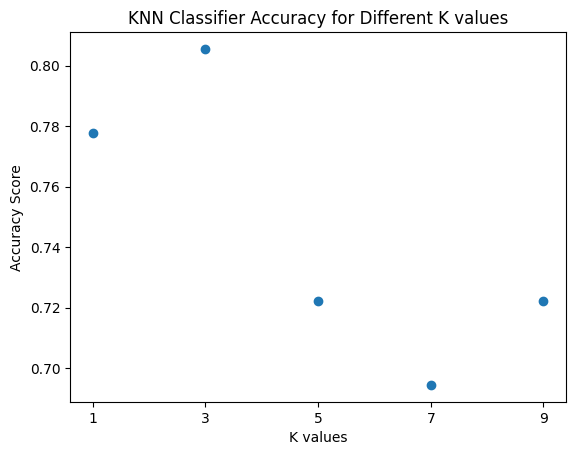

In [ ]:
plt.scatter(k_values,accuracy_score)
plt.xlabel('K values')
plt.ylabel('Accuracy Score')
plt.title('KNN Classifier Accuracy for Different K values')
# plt.xticks(k_values)
plt.show()

In [11]:
from sklearn.metrics import accuracy_score
k_values=range(1,30)
accuracy_score1=[]
for k in k_values:
    knn2=KNeighborsClassifier(n_neighbors=k)
    knn2.fit(X_train,y_train)
    y_pred=knn2.predict(X_test)
    accurace=accuracy_score(y_test,y_pred)
    accuracy_score1.append(accurace)

In [16]:
best_k=k_values[accuracy_score1.index(max(accuracy_score1))]
print(f"Best value of k: {best_k} with accuracy: {max(accuracy_score1)*100}")

Best value of k: 3 with accuracy: 80.55555555555556


In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
p_values = [1, 2, 3, 4, 5]# Train a KNN classifier for each value of p and record the accuracy scores
accuracy_scores = []
for p in p_values:
        knn = KNeighborsClassifier(n_neighbors=5, p=p) # Adjust n_neighbors as needed
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)


In [19]:
print("Accuracy scores for each p value:")
for p, accuracy in zip(p_values, accuracy_scores):
  print(f"p={p}: {accuracy}")
print()


Accuracy scores for each p value:
p=1: 0.8055555555555556
p=2: 0.7222222222222222
p=3: 0.7222222222222222
p=4: 0.7222222222222222
p=5: 0.7222222222222222



In [20]:

from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore")


In [22]:
df = pd.read_csv('income_evaluation.csv')
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [28]:
categorical_cols=df.select_dtypes(include=['object']).columns
numerical_cols=df.select_dtypes(exclude=['object']).columns

In [30]:
print(categorical_cols)
numerical_cols

Index([' workclass', ' education', ' marital-status', ' occupation',
       ' relationship', ' race', ' sex', ' native-country', 'income'],
      dtype='object')


Index(['age', ' fnlwgt', ' education-num', ' capital-gain', ' capital-loss',
       ' hours-per-week'],
      dtype='object')

In [31]:
df=pd.get_dummies(df,columns=categorical_cols,drop_first=True)

In [38]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
X = df.drop("income_ >50K", axis=1) # Adjust target column name based on get_dummies output
y = df["income_ >50K"]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [40]:
scaler= StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
display(X_train.head())


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
4400,-0.996110,-0.550200,-1.222152,-0.147881,-0.221529,-2.351924,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2598,0.181302,-0.077999,-0.427479,-0.147881,-0.221529,0.791095,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
496,-1.364051,0.666475,-0.030143,-0.147881,-0.221529,-0.036015,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4915,-1.511228,-0.028649,-1.222152,-0.147881,-0.221529,-1.690236,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1341,1.358714,-0.955980,1.559203,-0.147881,-0.221529,-0.036015,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [41]:
svc=SVC(random_state=101)
svc.fit(X_train,y_train)

SVC(random_state=101)

In [42]:

accuracies = cross_val_score(svc,X_train,y_train,cv=5)

print("Train Score:", np.mean(accuracies))

print("Test Score:", svc.score(X_test,y_test))


Train Score: 0.8461355529131985
Test Score: 0.8488593155893536


# Voting Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
	estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard'
)
voting_clf.fit(X_train, y_train)

# Example prediction for the first test sample
print(voting_clf.predict([X_test.iloc[0]]))


[False]


In [ ]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__,accuracy_score(y_test, y_pred))
  
  


LogisticRegression 0.8450570342205324
RandomForestClassifier 0.8450570342205324
SVC 0.8488593155893536
VotingClassifier 0.8526615969581749
